In [65]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", 200)

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SequentialFeatureSelector

from sklearn.model_selection import train_test_split

In [42]:
df = pd.read_csv('housing_clean.csv', index_col=0)
df.shape

(2374, 98)

### Dummify Nominal Features

In [43]:
categ_nom = ['MSSubClass','BldgType','HouseStyle','SaleType','SaleCondition','MiscFeature',
             'Fence','GarageType','RoofStyle','RoofMatl','exterior_covering','MasVnrType',
             'MSZoning','Street','LotShape','LandContour','LotConfig','LandSlope','Neighborhood',
             'Alley','condition','Foundation','Utilities','Heating','CentralAir','MoSold','Electrical','QrtSold']

In [44]:
df = pd.get_dummies(df, columns=categ_nom, drop_first=True)

### Remove original columns that have been ordinalized

In [45]:
df = df.drop(columns=[col for col in df.columns if col.endswith('_todrop')])

### Build base model

In [46]:
y = df['SalePrice'];
x = df.drop(['SalePrice', 'PID'], axis = 1)

In [48]:
randomForest = RandomForestRegressor();
randomForest.set_params(random_state=0);

randomForest.fit(x, y)

RandomForestRegressor(random_state=0)

In [49]:
randomForest.score(x, y)

0.9859556822757096

In [55]:
feature_importance = pd.DataFrame({"Features": x.columns, "Importance":randomForest.feature_importances_})

In [57]:
feature_importance.sort_values("Importance", ascending = False, inplace=True);
feature_importance.head(10)

,Features,Importance
3,OverallQual,0.566900
0,GrLivArea,0.154039
10,1stFlrSF,0.051299
9,TotalBsmtSF,0.033841
6,BsmtFinSF1,0.026805
2,LotArea,0.015650
23,GarageArea,0.015563
5,MasVnrArea,0.010158
11,2ndFlrSF,0.008444
47,house_age_derived,0.007108


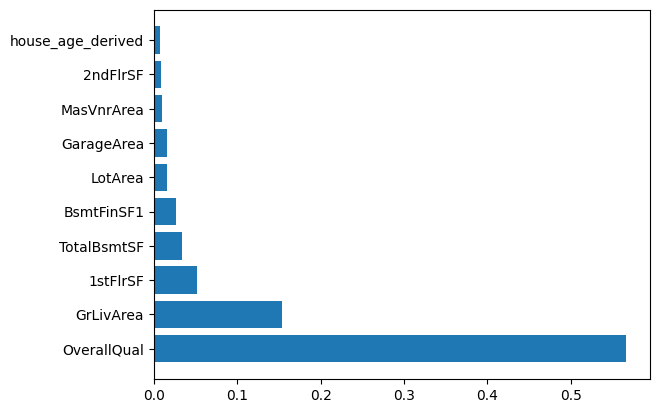

In [58]:
temp = feature_importance.iloc[:10,]
plt.barh(temp["Features"], temp["Importance"]);

In [59]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0);


randomForest.fit(x_train, y_train)

RandomForestRegressor(random_state=0)

In [60]:
# overfitting issue 
print("The train score: %.4f" %randomForest.score(x_train, y_train));
print("The test score: %.4f" %randomForest.score(x_test, y_test));

The train score: 0.9834
The test score: 0.9075


In [61]:
feature_importance = pd.DataFrame({"Features": x.columns, "Importance":randomForest.feature_importances_})

In [62]:
feature_importance.sort_values("Importance", ascending = False, inplace=True);
feature_importance.head(10)

,Features,Importance
3,OverallQual,0.566020
0,GrLivArea,0.147860
10,1stFlrSF,0.031793
9,TotalBsmtSF,0.029055
6,BsmtFinSF1,0.025417
23,GarageArea,0.020838
5,MasVnrArea,0.019969
2,LotArea,0.012793
31,GarageFinish_ordinal,0.012449
15,FullBath,0.009239


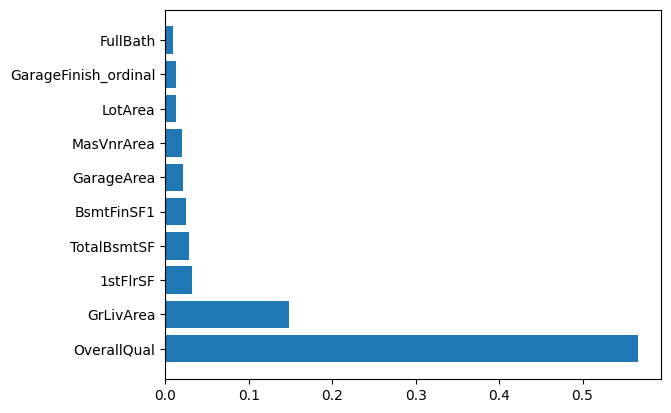

In [63]:
temp = feature_importance.iloc[:10,]
plt.barh(temp["Features"], temp["Importance"]);

### Setting parameter grid

In [67]:
param_grid = {
    'n_estimators': range(50, 300, 50),
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

### Initialize Model and Grid Search

In [70]:
rf = RandomForestRegressor(random_state=20)

grid_search_rf = GridSearchCV(estimator=rf,
                           param_grid=param_grid,
                           cv=5,
                           n_jobs=-1,
                           verbose=2,
                           scoring='r2')

grid_search_rf.fit(x_train, y_train)
%time grid_search_rf.fit(x_train, y_train)

Fitting 5 folds for each of 360 candidates, totalling 1800 fits
Fitting 5 folds for each of 360 candidates, totalling 1800 fits
CPU times: user 6.77 s, sys: 2.14 s, total: 8.91 s
Wall time: 9min 20s


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=20), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': range(50, 300, 50)},
             scoring='r2', verbose=2)

### View the best parameters and score

In [73]:
print("Best Parameters:", grid_search_rf.best_params_)
print("Best Score R square:", grid_search_rf.best_score_)

Best Parameters: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 250}
Best Score R square: 0.8863228561862455


In [75]:
best_model = grid_search_rf.best_estimator_

In [76]:
best_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 250,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 20,
 'verbose': 0,
 'warm_start': False}